**Singular Value Decomposition (SVD) Visualization**

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Ryan Ranjbar\AppData\Local\Temp\ipykernel_37072\2958636950.py:22: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title('$\mathbf{A}$\nThe matrix')
C:\Users\Ryan Ranjbar\AppData\Local\Temp\ipykernel_37072\2958636950.py:25: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_title('$\mathbf{U}$\n(left singular vects)')
C:\Users\Ryan Ranjbar\AppData\Local\Temp\ipykernel_37072\2958636950.py:28: SyntaxWarning: invalid escape sequence '\m'
  axs[2].set_title('$\mathbf{\Sigma}$\n(singular vals)')
C:\Users\Ryan Ranjbar\AppData\Local\Temp\ipykernel_37072\2958636950.py:32

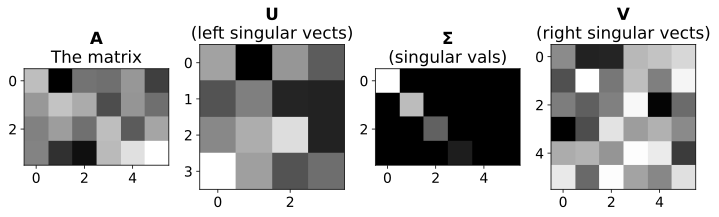

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

A = np.random.randn(4,6)

# its SVD
U,s,Vt = np.linalg.svd(A)

# create Sigma from sigma's
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

# show the matrices
_,axs = plt.subplots(1,4,figsize=(10,6))

axs[0].imshow(A,cmap='gray',aspect='equal')
axs[0].set_title('$\mathbf{A}$\nThe matrix')

axs[1].imshow(U,cmap='gray',aspect='equal')
axs[1].set_title('$\mathbf{U}$\n(left singular vects)')

axs[2].imshow(S,cmap='gray',aspect='equal')
axs[2].set_title('$\mathbf{\Sigma}$\n(singular vals)')


axs[3].imshow(Vt,cmap='gray',aspect='equal')
axs[3].set_title('$\mathbf{V}$\n(right singular vects)')

plt.tight_layout()
plt.savefig('Figure_14_02.png',dpi=300)
plt.show()

**SVD Analysis and Reconstruction of Stravinsky's Portrait**

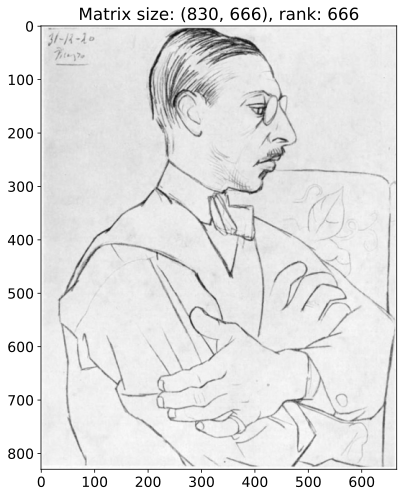

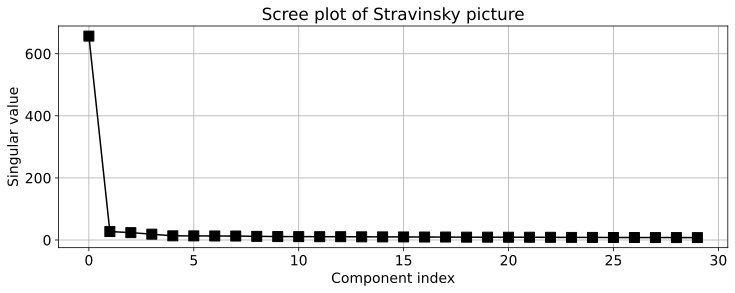

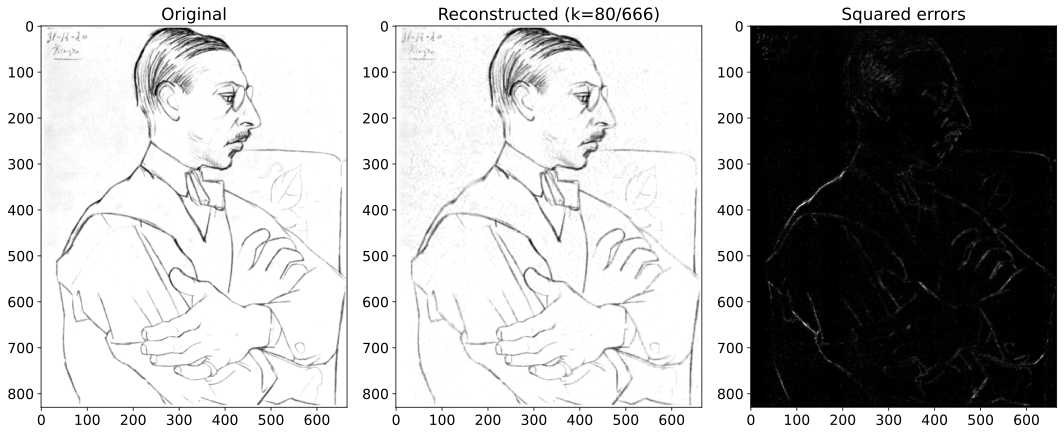

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

from skimage import io,color
url = 'https://upload.wikimedia.org/wikipedia/en/2/26/Igor_Stravinsky_as_drawn_by_Pablo_Picasso_31_Dec_1920_-_Gallica.jpg'

# import picture and downsample to 2D
strav = io.imread(url) / 255
#strav = color.rgb2gray(strav)

plt.figure(figsize=(8,8))
plt.imshow(strav,cmap='gray')
plt.title(f'Matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}')
plt.show()

# SVD
U,s,Vt = np.linalg.svd(strav)
S = np.zeros_like(strav)
np.fill_diagonal(S,s)

# show scree plot
plt.figure(figsize=(12,4))
plt.plot(s[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Stravinsky picture')
plt.grid()
plt.show()

          # Reconstruct based on first k layers

# number of components
k = 80

# reconstruction
stravRec = U[:,:k] @ S[:k,:k] @ Vt[:k,:]

# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(strav,cmap='gray',vmin=.1,vmax=.9)
axs[0].set_title('Original')

axs[1].imshow(stravRec,cmap='gray',vmin=.1,vmax=.9)
axs[1].set_title(f'Reconstructed (k={k}/{len(s)})')

axs[2].imshow((strav-stravRec)**2,cmap='gray',vmin=0,vmax=1e-1)
axs[2].set_title('Squared errors')

plt.tight_layout()
plt.savefig('Figure_15_10.png',dpi=300)
plt.show()

In [5]:
import numpy as np

# Generate a random matrix A
A = np.random.rand(5, 5)

# Perform Singular Value Decomposition
U, S, Vt = np.linalg.svd(A)

# Generate a random vector w
w = np.random.rand(5)

# Compute the magnitudes of the original and transformed vectors
magnitude_original = np.linalg.norm(w)
magnitude_transformed = np.linalg.norm(U.dot(w))

# Display results
print(f"Original magnitude: {magnitude_original:.6f}")
print(f"Transformed magnitude: {magnitude_transformed:.6f}")
print(f"Magnitudes are equal? {'Yes' if np.isclose(magnitude_original, magnitude_transformed) else 'No'}")


Original magnitude: 1.339210
Transformed magnitude: 1.339210
Magnitudes are equal? Yes
